<strong><h2>Andrew Ng- Machine Learning Course (Coursera)</h2></strong>
<br/>
<strong><h2>Programming Assignment 1 (Linear Regression)</h2></strong><br/>
<p align="justify">This is a implementation of the Linear Regression programming assignment in PYTHON.
The below code is the conversion of Octave exercise program into python. This is just the part of the assignment. You can find the replica of this code in Ocatve inside the assigment folder exercise 1 (i.e. ex1.m file).</p>

<h2>Dependencies</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2>Dataset</h2><br/>
Converted the .txt file of the assignment into the .csv file and add the header as Population, Profit.

From file 'ex1data1.csv' has been chosen the variables:
 - **Population** : Population of City in 10,000s
 - **Profit** : Profit in $10,000
 
Read the file, save data as matrix. Assign x to 1st column(population) and y to 2nd column(profit) 

In [2]:
dataset = pd.read_csv('ex1data1.csv')
data = dataset.as_matrix()
x = data[:, 0]
y = data[:, 1]
m = data.shape[0]
dataset.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


<h4>Let's plot the data.</h4> 

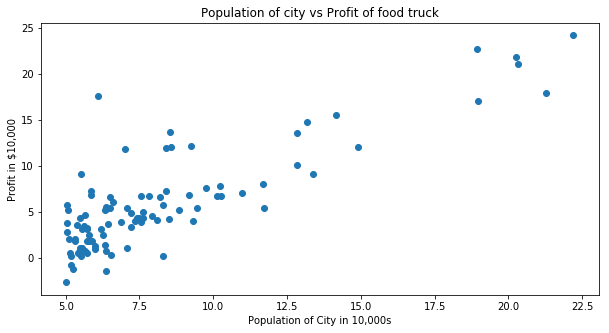

In [3]:
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.title('Population of city vs Profit of food truck')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000')
plt.show()

In [4]:
x0 = np.ones((m,1)) #initialize the x0 variables
x = np.reshape(x, (m,1)) # convert the dataset x into m*1 matrix
Y = np.reshape(y, (m,1)) # convert the dataset y into m*1 matrix
X = np.concatenate((x0, x), axis=1) # create a m*2 matrix by concatenating the x0 and x

theta = np.zeros((2,1)) #initalize the theta 2*1 matrix

iterations = 1500 # no of iterations
alpha = 0.01 # learning rate

<h4>Defined the computeCost function</h4>

In [5]:
def computeCost(x, y, theta):
    m = len(y)
    j = 0
    j = (np.sum((x.dot(theta) - y )**2)) / (2*m)
    return j

In [6]:
j = computeCost(X, Y, theta) # compute cost at theta[0;0]
j

32.072733877455676

In [7]:
theta = np.array([[-1], [2]]) # compute cost at theta[-1,2]
J = computeCost(X,Y, theta)
J

54.242455082012377

<h4>Defined the gradientDescent function</h4>

In [8]:
def gradientDescent(x, y, theta, alpha, num_iter):
    m = len(y)
    j_history = np.zeros((num_iter, 1))
    for i in range(num_iter):
        theta = theta - ((((X.dot(theta)-Y).T).dot(X).T) * alpha  / m)
        j_history[i] = computeCost(x, y, theta)
    
    return j_history, theta

In [10]:
new_theta = gradientDescent(X, Y, theta, alpha, iterations) #compute new theta
theta = new_theta[1]
theta

array([[-3.88335345],
       [ 1.19178517]])

<h4>Plot</h4>

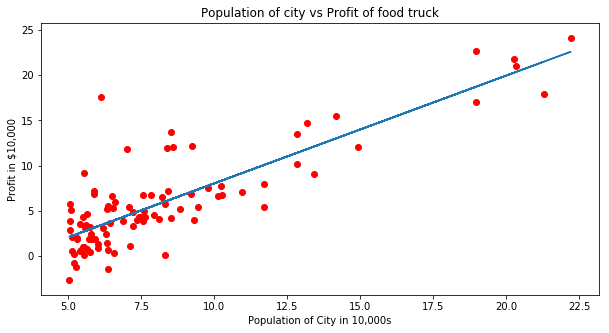

In [11]:
plt.figure(figsize=(10,5))
plt.plot(data[:, 0], X.dot(theta))
plt.scatter(data[:,0], data[:,1],color='red')
plt.title('Population of city vs Profit of food truck')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000')
plt.show()

In [12]:
sample1 = np.reshape([1,3.5],(1,2)) # for population 35,000, predicted price
predict1 = sample1.dot(theta)
predict1*10000

array([[ 2878.94661466]])

In [13]:
sample2 = np.reshape([1, 7],(1,2))  # for population 70,000, predicted price
predict2 = sample2.dot(theta)
predict2*10000

array([[ 44591.42770303]])